# Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

# Loading data

In [2]:
data = pd.read_parquet(r"C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022/V5_NormalizeScaling_trainData.parquet")
data.head()

,taxi_demand,timestamp_quarter_end,timestamp_year_start,timestamp_leap_year,timestamp_hour,timestamp_days_in_month,passenger_demand_expanding_std,timestamp_day_of_week,taxi_demand_lag_1,timestamp_day_of_month,timestamp_second,passenger_demand_lag_8,timestamp_day_of_year,timestamp_month_start,timestamp_minute,timestamp_year_end,timestamp_year,passenger_demand_lag_16,timestamp_month_end,passenger_demand_lag_1
0,-0.086022,-0.052556,0,0.505760,-0.522269,-1.208005,0.500165,1.794973,-1.67886,0,0.487895,-0.873014,5.560193,0,-0.010714,0,-0.877515,-0.173985,1.784811,10909.0
1,-0.086022,-0.052556,0,0.650209,-0.522269,0.841812,0.500165,2.036293,-1.67886,0,0.841318,-0.873014,5.560193,0,-0.010714,0,0.338043,-0.173985,2.085388,12127.0
2,-0.086022,-0.052556,0,0.794657,-0.522269,2.012897,0.500165,1.828306,-1.67886,0,0.890432,-0.873014,5.560193,0,-0.010714,0,-0.127694,-0.173985,1.867729,11245.0
3,-0.086022,-0.052556,0,0.939105,-0.522269,4.058447,0.500165,2.488032,-1.67886,0,1.108854,-0.873014,5.560193,0,-0.010714,0,-0.450774,-0.173985,2.464934,13665.0
4,-0.086022,-0.052556,0,1.083554,-0.522269,6.209444,0.500165,2.744630,-1.67886,0,1.235711,-0.873014,5.560193,0,-0.010714,0,-0.686728,-0.173985,2.737625,14770.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713 entries, 0 to 8712
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   taxi_demand                     8713 non-null   float64
 1   timestamp_quarter_end           8713 non-null   float64
 2   timestamp_year_start            8713 non-null   int64  
 3   timestamp_leap_year             8713 non-null   float64
 4   timestamp_hour                  8713 non-null   float64
 5   timestamp_days_in_month         8713 non-null   float64
 6   passenger_demand_expanding_std  8713 non-null   float64
 7   timestamp_day_of_week           8713 non-null   float64
 8   taxi_demand_lag_1               8713 non-null   float64
 9   timestamp_day_of_month          8713 non-null   int32  
 10  timestamp_second                8713 non-null   float64
 11  passenger_demand_lag_8          8713 non-null   float64
 12  timestamp_day_of_year           87

In [4]:
df = data.copy()

# Principal Component Analysis (PCA)

In [5]:
reducer = PCA(
    n_components=19,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=33,
)
reducer

PCA(n_components=19, random_state=33)

In [6]:
# Extract features and target variable

In [7]:
features = df.drop(columns=['taxi_demand'])
target = df['taxi_demand']

In [8]:
# Perform PCA for dimensionality reduction

In [9]:
pca = PCA(n_components=19)
features_reduced = pca.fit_transform(features)

In [10]:
# Combine reduced features with the target variable for plotting

In [11]:
reduced_df = pd.DataFrame({'PC1': features_reduced[:, 0],
                           'PC2': features_reduced[:, 1],
                           'PC3': features_reduced[:, 2],
                           'PC4': features_reduced[:, 3],
                           'PC5': features_reduced[:, 4],
                           'PC6': features_reduced[:, 5],
                           'PC7': features_reduced[:, 6],
                           'PC8': features_reduced[:, 7],
                           'PC9': features_reduced[:, 8],
                           'PC10': features_reduced[:, 9],
                           'PC11': features_reduced[:, 10],
                           'PC12': features_reduced[:, 11],
                           'PC13': features_reduced[:, 12],
                           'PC14': features_reduced[:, 13],
                           'PC15': features_reduced[:, 14],
                           'PC16': features_reduced[:, 15],
                           'PC17': features_reduced[:, 16],
                           'PC18': features_reduced[:, 17],
                           'PC19': features_reduced[:, 18],
                           'taxi_demand': target})
reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,taxi_demand
0,7232.423961,1.917840,3.593047,-1.520966,1.378757,1.594858,-0.398472,-0.214360,-2.450065,-0.298501,-2.372837,0.853763,-1.258673,-0.016103,-2.541717e-15,-4.228377e-14,1.265271e-17,9.903077e-21,-6.415206e-32,-0.086022
1,8450.424030,2.242227,3.789262,-0.164432,1.304658,0.776806,-0.565016,0.171054,-2.796305,-0.094508,-2.241521,1.258338,0.361904,0.040717,5.565055e-13,-2.290931e-16,-2.459113e-16,3.465575e-21,2.819584e-30,-0.086022
2,7568.423905,2.921402,3.676932,0.123669,1.305928,0.252489,-0.408997,0.327325,-2.931228,-0.347989,-2.125539,1.834953,0.778209,0.013537,-7.894685e-16,9.182485e-14,4.328383e-17,1.672041e-20,-5.235990e-31,-0.086022
3,9988.423917,4.125735,3.488578,0.979430,1.287473,-0.610574,-0.368645,0.694405,-3.199143,-0.312189,-1.877975,3.015216,1.453752,-0.073135,-2.309535e-15,1.066815e-13,-4.836991e-18,-1.045812e-19,-4.348663e-31,-0.086022
4,11093.423843,5.250869,3.348828,1.852266,1.265425,-1.525679,-0.294683,1.056983,-3.481290,-0.309485,-1.655867,4.082340,2.310911,-0.079123,1.132270e-15,1.138803e-14,4.044429e-17,-7.080540e-19,-2.756465e-30,-0.086022


In [12]:
# reduced_df.info()

In [13]:
# Plot the reduced features against the target

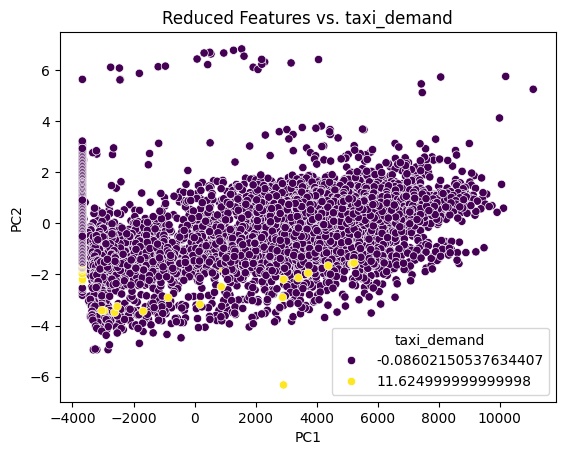

In [14]:
sns.scatterplot(x='PC1', y='PC2', data=reduced_df, hue='taxi_demand', palette='viridis')
plt.title('Reduced Features vs. taxi_demand')
plt.show()

In [15]:
# pc_columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19']

# T-distributed Stochastic Neighbor Embedding.(TSNE)

In [16]:
# TSNE?

In [17]:
from sklearn.manifold import TSNE
reducerT = TSNE(n_components=19, perplexity=30.0, early_exaggeration=12.0,
            learning_rate='auto', n_iter=1000, n_iter_without_progress=300,
            min_grad_norm=1e-07, metric='euclidean', init='pca',
            verbose=0, random_state=33, method='barnes_hut', angle=0.5,
            n_jobs=None)
reducerT

TSNE(n_components=19, random_state=33)

In [18]:
df2 = data.copy()

In [19]:
df2.head()

,taxi_demand,timestamp_quarter_end,timestamp_year_start,timestamp_leap_year,timestamp_hour,timestamp_days_in_month,passenger_demand_expanding_std,timestamp_day_of_week,taxi_demand_lag_1,timestamp_day_of_month,timestamp_second,passenger_demand_lag_8,timestamp_day_of_year,timestamp_month_start,timestamp_minute,timestamp_year_end,timestamp_year,passenger_demand_lag_16,timestamp_month_end,passenger_demand_lag_1
0,-0.086022,-0.052556,0,0.505760,-0.522269,-1.208005,0.500165,1.794973,-1.67886,0,0.487895,-0.873014,5.560193,0,-0.010714,0,-0.877515,-0.173985,1.784811,10909.0
1,-0.086022,-0.052556,0,0.650209,-0.522269,0.841812,0.500165,2.036293,-1.67886,0,0.841318,-0.873014,5.560193,0,-0.010714,0,0.338043,-0.173985,2.085388,12127.0
2,-0.086022,-0.052556,0,0.794657,-0.522269,2.012897,0.500165,1.828306,-1.67886,0,0.890432,-0.873014,5.560193,0,-0.010714,0,-0.127694,-0.173985,1.867729,11245.0
3,-0.086022,-0.052556,0,0.939105,-0.522269,4.058447,0.500165,2.488032,-1.67886,0,1.108854,-0.873014,5.560193,0,-0.010714,0,-0.450774,-0.173985,2.464934,13665.0
4,-0.086022,-0.052556,0,1.083554,-0.522269,6.209444,0.500165,2.744630,-1.67886,0,1.235711,-0.873014,5.560193,0,-0.010714,0,-0.686728,-0.173985,2.737625,14770.0


In [20]:
X = df2.drop(columns=['taxi_demand'])
y = df2['taxi_demand']

In [21]:
tsne = TSNE(n_components=2)
features_reduced = tsne.fit_transform(X)

In [22]:
reduced_df2 = pd.DataFrame({'PC1': features_reduced[:, 0],
                           'PC2': features_reduced[:, 1],
                           'taxi_demand': target})
reduced_df2.head()

,PC1,PC2,taxi_demand
0,88.386391,-7.524859,-0.086022
1,110.899384,-4.303021,-0.086022
2,94.522751,-22.851168,-0.086022
3,113.510307,7.229337,-0.086022
4,113.580666,7.730423,-0.086022


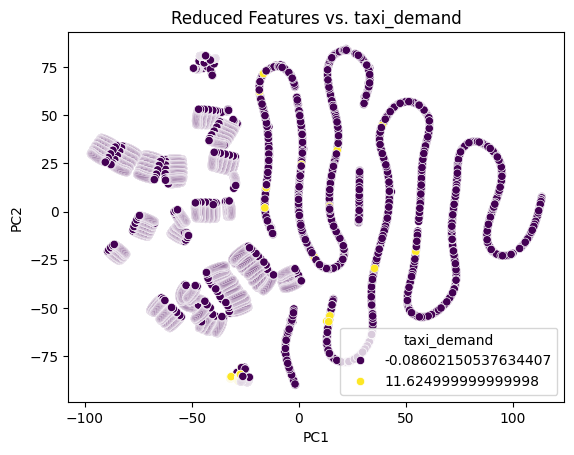

In [23]:
sns.scatterplot(x='PC1', y='PC2', data=reduced_df2, hue='taxi_demand', palette='viridis')
plt.title('Reduced Features vs. taxi_demand')
plt.show()

In [24]:
reduced_df.to_parquet('C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022/V6_ReduceDimension_Data.parquet', index=False)